In [140]:
import pandas as pd
import seaborn as sns

URL = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv?where=Landkreis%20%3D%20%27SK%20Dresden%27"

docs = pd.read_csv( URL, parse_dates=["Meldedatum"])
#weekly = docs.set_index("Meldedatum").groupby("Altersgruppe").resample("W").agg({"AnzahlFall":"sum"}).reset_index()
weekly = docs.set_index("Meldedatum").groupby("Altersgruppe").resample("W").agg({"AnzahlFall":"sum"}).fillna(0)
#weekly = weekly.reset_index().pivot(index='Altersgruppe', columns='Meldedatum', values='AnzahlFall').pct_change(axis="columns") * 100
weekly_pct = weekly.pct_change() * 100
weekly_pcts = weekly_pct.reset_index().pivot(index='Altersgruppe', columns='Meldedatum', values='AnzahlFall')

In [160]:
weekly_pcts = weekly_pcts.loc[ weekly_pcts.index != "unbekannt" ] 
cols = [ X for X in weekly_pcts.columns if X.year == 2021 and X != max(weekly_pcts.columns) ]
weekly_pcts = weekly_pcts[ cols ]

<AxesSubplot:xlabel='Meldedatum', ylabel='Altersgruppe'>

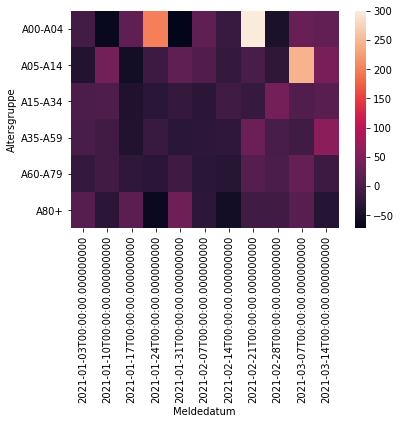

In [161]:
sns.heatmap(weekly_pcts)